# Sorghum Yield Predictions with Ensemble Models

In [1]:
#important libraries
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,\
StackingRegressor,VotingRegressor,HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, RepeatedKFold
from matplotlib import pyplot
from scipy.stats import sem
from numpy import mean
from numpy import std

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

import itertools
from itertools import permutations
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set()

%matplotlib inline

## Import Train and Test Data

In [25]:
df = pd.read_csv('../../../data/data-1.3-yellow.csv',index_col = 0)
df.head()

PlotID Treatment         PI       CHL       EWT       LWC        SLA  \
0    5001        HN  PI 656057  467.6750  0.048621  0.816438  91.477861   
1    5002        HN  PI 656011  512.3625  0.043236  0.768144  76.626487   
2    5014        HN  PI 534117       NaN       NaN       NaN        NaN   
3    5015        HN     BTx623       NaN       NaN       NaN        NaN   
4    5016        HN     BTx623       NaN       NaN       NaN        NaN   

       N      P     K     Mg     Ca      S     Fe    Mn    B    Cu    Zn  \
0  3.612  0.381  1.93  0.245  0.674  0.206  171.0  31.0  6.4  17.6  28.0   
1  2.916  0.387  2.24  0.143  0.447  0.196  134.0  34.0  4.6  12.5  27.0   
2    NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   NaN   
3    NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   NaN   
4    NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   NaN   

       X350      X351      X352      X353      X354      X355      X356  \
0  0.085242  0.084198  0.073049  0.062852  0.071412  0.076959  0.086402   
1  0.053529  0.087761  0.089831  0.066536  0.070464  0.065440  0.057905   
2  0.119853  0.089598  0.093482  0.111414  0.079122  0.059123  0.080614   
3  0.087480  0.102200  0.112072  0.109021  0.096971  0.088650  0.079650   
4  0.120226  0.070748  0.053416  0.070563  0.062600  0.046475  0.061267   

       X357      X358      X359      X360      X361      X362      X363  \
0  0.089655  0.068680  0.077627  0.075629  0.049378  0.047664  0.048732   
1  0.061879  0.087529  0.083688  0.066741  0.054267  0.042131  0.050978   
2  0.111972  0.087410  0.104930  0.096836  0.053224  0.080590  0.084966   
3  0.069502  0.061583  0.063581  0.063916  0.057499  0.052230  0.050146   
4  0.086586  0.061980  0.078884  0.087223  0.066724  0.066786  0.068153   

       X364      X365      X366      X367      X368      X369      X370  \
0  0.053430  0.059725  0.043177  0.055788  0.069612  0.049814  0.054452   
1  0.056994  0.045107  0.046368  0.043490  0.042569  0.050927  0.046258   
2  0.075567  0.074128  0.078823  0.067031  0.053021  0.057072  0.060873   
3  0.051929  0.057628  0.068537  0.071899  0.064342  0.049210  0.040311   
4  0.064134  0.055916  0.059502  0.050772  0.042891  0.052731  0.048797   

       X371      X372      X373      X374      X375      X376      X377  \
0  0.055179  0.045720  0.038621  0.047542  0.053812  0.049443  0.042255   
1  0.041853  0.043365  0.048262  0.047062  0.048264  0.051650  0.044692   
2  0.065333  0.067081  0.061981  0.071762  0.075621  0.067405  0.063775   
3  0.043344  0.052114  0.055250  0.051213  0.045734  0.043992  0.048554   
4  0.049588  0.052458  0.043302  0.051977  0.055814  0.048201  0.048429   

       X378      X379      X380      X381      X382      X383      X384  \
0  0.043361  0.048633  0.051029  0.044424  0.043408  0.041854  0.032599   
1  0.043194  0.040966  0.035022  0.041995  0.044352  0.042166  0.041462   
2  0.060381  0.061531  0.067389  0.065502  0.061511  0.059425  0.060912   
3  0.051052  0.050399  0.048936  0.053607  0.054198  0.049047  0.042811   
4  0.049429  0.050073  0.049999  0.047943  0.045547  0.044132  0.044034   

       X385      X386      X387      X388      X389      X390      X391  \
0  0.041451  0.048299  0.048850  0.050056  0.046709  0.043648  0.042465   
1  0.043841  0.043980  0.042063  0.041588  0.038251  0.035009  0.034469   
2  0.060602  0.060764  0.061790  0.062637  0.064547  0.063739  0.060583   
3  0.053208  0.055781  0.048785  0.046415  0.043908  0.047679  0.054650   
4  0.042231  0.042918  0.044714  0.043390  0.050289  0.052161  0.045801   

       X392      X393      X394      X395      X396      X397      X398  \
0  0.038687  0.046113  0.051060  0.044858  0.047175  0.049994  0.049110   
1  0.037531  0.040736  0.042420  0.042195  0.041240  0.040235  0.039823   
2  0.061476  0.058410  0.057525  0.062045  0.058640  0.057564  0.058823   
3  0.048783  0.052314  0.054007  0.045919  0.048827  0.052774  0.054797   
4  0.044632  0

In [26]:
df.shape

(718, 2177)

### Calculate Principal Components

In [3]:
sub = df[df.columns[18:-8]] #reflectance data
sub.head()

X350      X351      X352      X353      X354      X355      X356  \
0  0.085242  0.084198  0.073049  0.062852  0.071412  0.076959  0.086402   
1  0.053529  0.087761  0.089831  0.066536  0.070464  0.065440  0.057905   
2  0.119853  0.089598  0.093482  0.111414  0.079122  0.059123  0.080614   
3  0.087480  0.102200  0.112072  0.109021  0.096971  0.088650  0.079650   
4  0.120226  0.070748  0.053416  0.070563  0.062600  0.046475  0.061267   

       X357      X358      X359      X360      X361      X362      X363  \
0  0.089655  0.068680  0.077627  0.075629  0.049378  0.047664  0.048732   
1  0.061879  0.087529  0.083688  0.066741  0.054267  0.042131  0.050978   
2  0.111972  0.087410  0.104930  0.096836  0.053224  0.080590  0.084966   
3  0.069502  0.061583  0.063581  0.063916  0.057499  0.052230  0.050146   
4  0.086586  0.061980  0.078884  0.087223  0.066724  0.066786  0.068153   

       X364      X365      X366      X367      X368      X369      X370  \
0  0.053430  0.059725  0.043177  0.055788  0.069612  0.049814  0.054452   
1  0.056994  0.045107  0.046368  0.043490  0.042569  0.050927  0.046258   
2  0.075567  0.074128  0.078823  0.067031  0.053021  0.057072  0.060873   
3  0.051929  0.057628  0.068537  0.071899  0.064342  0.049210  0.040311   
4  0.064134  0.055916  0.059502  0.050772  0.042891  0.052731  0.048797   

       X371      X372      X373      X374      X375      X376      X377  \
0  0.055179  0.045720  0.038621  0.047542  0.053812  0.049443  0.042255   
1  0.041853  0.043365  0.048262  0.047062  0.048264  0.051650  0.044692   
2  0.065333  0.067081  0.061981  0.071762  0.075621  0.067405  0.063775   
3  0.043344  0.052114  0.055250  0.051213  0.045734  0.043992  0.048554   
4  0.049588  0.052458  0.043302  0.051977  0.055814  0.048201  0.048429   

       X378      X379      X380      X381      X382      X383      X384  \
0  0.043361  0.048633  0.051029  0.044424  0.043408  0.041854  0.032599   
1  0.043194  0.040966  0.035022  0.041995  0.044352  0.042166  0.041462   
2  0.060381  0.061531  0.067389  0.065502  0.061511  0.059425  0.060912   
3  0.051052  0.050399  0.048936  0.053607  0.054198  0.049047  0.042811   
4  0.049429  0.050073  0.049999  0.047943  0.045547  0.044132  0.044034   

       X385      X386      X387      X388      X389      X390      X391  \
0  0.041451  0.048299  0.048850  0.050056  0.046709  0.043648  0.042465   
1  0.043841  0.043980  0.042063  0.041588  0.038251  0.035009  0.034469   
2  0.060602  0.060764  0.061790  0.062637  0.064547  0.063739  0.060583   
3  0.053208  0.055781  0.048785  0.046415  0.043908  0.047679  0.054650   
4  0.042231  0.042918  0.044714  0.043390  0.050289  0.052161  0.045801   

       X392      X393      X394      X395      X396      X397      X398  \
0  0.038687  0.046113  0.051060  0.044858  0.047175  0.049994  0.049110   
1  0.037531  0.040736  0.042420  0.042195  0.041240  0.040235  0.039823   
2  0.061476  0.058410  0.057525  0.062045  0.058640  0.057564  0.058823   
3  0.048783  0.052314  0.054007  0.045919  0.048827  0.052774  0.054797   
4  0.044632  0.047113  0.050603  0.051361  0.043024  0.043116  0.047659   

       X399      X400      X401      X402      X403      X404      X405  \
0  0.043823  0.043862  0.041952  0.039572  0.044624  0.044988  0.046128   
1  0.040379  0.041654  0.042781  0.042810  0.041331  0.044993  0.048847   
2  0.058657  0.056359  0.056490  0.059140  0.060611  0.057030  0.055395   
3  0.054688  0.052701  0.053489  0.055446  0.052672  0.051452  0.052453   
4  0.046490  0.046544  0.048318  0.049059  0.044705  0.043497  0.044946   

       X406      X407      X408      X409      X410      X411      X412  \
0  0.048967  0.043201  0.043568  0.048380  0.051787  0.049475  0.048316   
1  0.048443  0.042648  0.044995  0.048170  0.044979  0.047369  0.049684   
2  0.058313  0.059271  0.057111  0.056335  0.059869  0.060999  0.058410   
3  0.054213  0.053440  0.053335  0.055460  0.058738  0.055531  0.052192   
4  0.047421  0.050023  0

In [4]:
n_components =50
pca = PCA(n_components)
sub_trans = pca.fit_transform(sub.values)
sub_df = pd.DataFrame(data = sub_trans
         , columns = ["PC"+str(i) for i in list(range(1,n_components+1))])
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,1.605573,-0.043835,-0.030361,0.085744,0.001306,-0.015155,-0.070677,-0.030338,0.006748,-0.016798,0.005990,0.016976,0.019702,0.034228,0.022065,0.005977,-0.031311,-0.018829,0.009893,-0.001837,0.012569,-0.002283,0.012062,-0.005581,0.000510,0.007049,-0.005976,0.004216,0.005808,0.007893,0.007733,0.019107,0.006512,-0.007846,0.011291,0.000539,-0.005377,-0.002873,-0.000773,0.005367,-0.008324,-0.008512,0.000849,0.006984,0.003688,0.001294,0.007428,-0.001031,-0.002360,0.001546
1,-0.197533,0.439214,-0.177906,0.033007,-0.049042,0.120014,-0.038021,-0.010366,-0.016088,-0.029575,-0.033460,-0.019940,0.007503,0.023361,0.022272,0.015716,-0.009486,-0.014650,0.003489,0.006374,-0.028045,-0.004194,0.003653,0.010125,0.006794,0.003756,-0.004919,0.015182,-0.000365,0.000609,0.000134,-0.005559,-0.003065,-0.004783,-0.008212,-0.002607,-0.002349,0.007627,-0.008526,-0.004776,0.009922,0.001731,0.006296,0.002834,-0.004125,-0.000586,-0.001502,-0.003460,0.003168,0.000604
2,0.865073,-0.081640,-0.283663,0.168263,-0.099433,0.037503,-0.019702,0.003077,-0.025382,0.052644,0.037883,0.022517,-0.005808,-0.003142,0.008544,0.013184,0.012954,0.005085,0.048782,-0.017067,-0.003379,0.007620,-0.010470,-0.004656,0.009092,-0.011608,-0.011490,-0.006400,-0.012471,-0.012262,-0.004139,-0.000169,-0.004220,-0.014573,-0.005329,0.004666,-0.003533,0.004032,0.000229,-0.002078,-0.007471,-0.002197,-0.002186,0.000516,-0.004637,0.005698,0.004776,0.001843,0.003586,0.001641
3,-0.465272,0.053995,-0.191456,0.081173,0.002137,0.014570,0.022042,-0.021372,0.000378,0.003926,0.007003,-0.021671,-0.037506,0.001557,-0.009373,-0.011184,0.005922,0.006669,0.001648,-0.025272,-0.012926,-0.008491,0.000502,-0.014997,-0.019029,0.001694,0.011801,0.007446,-0.001113,0.000360,0.002938,-0.000711,-0.001647,-0.007862,-0.001419,-0.010809,0.000957,-0.008147,-0.002615,-0.003870,-0.002570,0.002878,-0.001642,0.000338,-0.002668,-0.004032,0.000788,-0.002601,-0.000617,-0.001652
4,0.636725,-0.669482,0.008965,0.080435,0.071616,0.023189,0.010295,-0.011048,-0.012256,0.013127,0.036777,0.010811,0.027547,-0.023461,0.022893,0.019867,0.012005,0.011041,0.003273,-0.008481,0.000388,0.003252,-0.009461,0.004594,0.009874,-0.013188,-0.001064,-0.007040,-0.001990,-0.008245,0.004615,-0.006226,-0.003750,-0.008262,-0.001117,0.011544,-0.000409,-0.001580,-0.005628,0.000535,-0.004610,-0.000937,-0.000324,0.004214,0.000366,0.000088,-0.001548,0.000409,0.002268,0.004366


<AxesSubplot:>

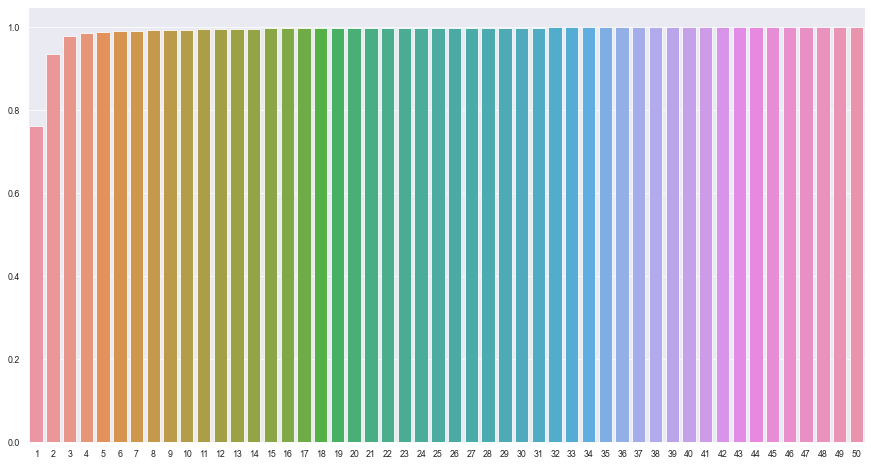

In [5]:
total_var = pca.explained_variance_ratio_.sum() * 100
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (15,8))
sns.set_context('paper')
sns.barplot(x = list(range(1,n_components+1,1)), y = exp_var_cumul)

In [6]:
total_var #explained variance

99.98482132510912

In [7]:
sub_df['DaysToBloom'] = df['DaysToBloom']
sub_df['treatment'] = df.Treatment

In [8]:
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,DaysToBloom,treatment
0,1.605573,-0.043835,-0.030361,0.085744,0.001306,-0.015155,-0.070677,-0.030338,0.006748,-0.016798,0.005990,0.016976,0.019702,0.034228,0.022065,0.005977,-0.031311,-0.018829,0.009893,-0.001837,0.012569,-0.002283,0.012062,-0.005581,0.000510,0.007049,-0.005976,0.004216,0.005808,0.007893,0.007733,0.019107,0.006512,-0.007846,0.011291,0.000539,-0.005377,-0.002873,-0.000773,0.005367,-0.008324,-0.008512,0.000849,0.006984,0.003688,0.001294,0.007428,-0.001031,-0.002360,0.001546,83.0,HN
1,-0.197533,0.439214,-0.177906,0.033007,-0.049042,0.120014,-0.038021,-0.010366,-0.016088,-0.029575,-0.033460,-0.019940,0.007503,0.023361,0.022272,0.015716,-0.009486,-0.014650,0.003489,0.006374,-0.028045,-0.004194,0.003653,0.010125,0.006794,0.003756,-0.004919,0.015182,-0.000365,0.000609,0.000134,-0.005559,-0.003065,-0.004783,-0.008212,-0.002607,-0.002349,0.007627,-0.008526,-0.004776,0.009922,0.001731,0.006296,0.002834,-0.004125,-0.000586,-0.001502,-0.003460,0.003168,0.000604,76.0,HN
2,0.865073,-0.081640,-0.283663,0.168263,-0.099433,0.037503,-0.019702,0.003077,-0.025382,0.052644,0.037883,0.022517,-0.005808,-0.003142,0.008544,0.013184,0.012954,0.005085,0.048782,-0.017067,-0.003379,0.007620,-0.010470,-0.004656,0.009092,-0.011608,-0.011490,-0.006400,-0.012471,-0.012262,-0.004139,-0.000169,-0.004220,-0.014573,-0.005329,0.004666,-0.003533,0.004032,0.000229,-0.002078,-0.007471,-0.002197,-0.002186,0.000516,-0.004637,0.005698,0.004776,0.001843,0.003586,0.001641,55.0,HN
3,-0.465272,0.053995,-0.191456,0.081173,0.002137,0.014570,0.022042,-0.021372,0.000378,0.003926,0.007003,-0.021671,-0.037506,0.001557,-0.009373,-0.011184,0.005922,0.006669,0.001648,-0.025272,-0.012926,-0.008491,0.000502,-0.014997,-0.019029,0.001694,0.011801,0.007446,-0.001113,0.000360,0.002938,-0.000711,-0.001647,-0.007862,-0.001419,-0.010809,0.000957,-0.008147,-0.002615,-0.003870,-0.002570,0.002878,-0.001642,0.000338,-0.002668,-0.004032,0.000788,-0.002601,-0.000617,-0.001652,62.0,HN
4,0.636725,-0.669482,0.008965,0.080435,0.071616,0.023189,0.010295,-0.011048,-0.012256,0.013127,0.036777,0.010811,0.027547,-0.023461,0.022893,0.019867,0.012005,0.011041,0.003273,-0.008481,0.000388,0.003252,-0.009461,0.004594,0.009874,-0.013188,-0.001064,-0.007040,-0.001990,-0.008245,0.004615,-0.006226,-0.003750,-0.008262,-0.001117,0.011544,-0.000409,-0.001580,-0.005628,0.000535,-0.004610,-0.000937,-0.000324,0.004214,0.000366,0.000088,-0.001548,0.000409,0.002268,0.004366,62.0,HN


In [9]:
sub_df.shape

(718, 52)

### Train Test Split

In [10]:
#df.rename(columns = {'Treatment':'treatment'},inplace = True)

In [11]:
## Data Split
X = sub_df[sub_df.columns[:-2]]
y = sub_df[['treatment','DaysToBloom']]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

train_data = pd.concat([X_train, y_train], axis = 1)
print(f"Train Dataset: {train_data.shape[0]} row/records. F: {train_data[train_data.treatment=='HN'].shape[0]} and N: {train_data[train_data.treatment =='LN'].shape[0]}\n")

test_data = pd.concat([X_test,y_test], axis = 1)
print(f"Train Dataset: {test_data.shape[0]} row/records. F: {test_data[test_data.treatment=='HN'].shape[0]} and N: {test_data[test_data.treatment =='LN'].shape[0]}")



Train Dataset: 502 row/records. F: 190 and N: 312

Train Dataset: 216 row/records. F: 76 and N: 140


In [12]:
#features
features = list(sub_df.columns)[:-2]

## Important Functions

In [13]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    estimators= 100
    model = RandomForestRegressor(n_estimators = estimators)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

## RF  - Both Treatment

In [14]:
#check the head of training dataset
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,treatment,DaysToBloom
70,0.489374,-0.265083,0.065074,0.006027,0.027219,-0.024348,-0.016872,0.041793,0.040324,-0.015815,0.005077,-0.008334,-0.007494,-0.016230,0.003026,0.046671,-0.013769,-0.009726,0.023697,-0.006531,-0.007734,0.004569,0.013081,-0.010577,-0.004816,-0.008908,-0.010844,-0.012425,0.007964,-0.013983,-0.008606,0.000853,-0.006464,0.021337,0.007834,0.011659,-0.003795,0.004887,0.004517,0.004545,0.002559,-0.000326,-0.003936,0.006969,0.001166,-0.001275,0.001391,0.005458,0.001352,-0.002467,HN,75.0
435,1.143298,-0.244252,-0.168787,0.006952,0.019847,-0.032219,-0.021752,-0.021815,0.044773,0.023087,-0.033583,-0.035741,-0.013619,-0.015392,-0.031590,0.019301,-0.005317,-0.005338,0.016343,0.002471,-0.009155,-0.013701,-0.011188,0.007163,0.000508,0.006594,0.010877,0.003161,0.004633,-0.003356,0.000179,-0.007581,0.004067,-0.003268,0.001425,-0.005732,0.001963,0.009971,0.003340,-0.002794,-0.003445,-0.000388,-0.000063,0.000243,0.001388,0.005524,-0.003620,0.001467,0.002449,-0.000398,LN,65.0
653,-0.274708,-0.561806,0.152626,0.009229,0.019606,0.002328,-0.020753,-0.067837,0.017152,-0.017464,0.031317,0.015568,0.000886,0.002793,0.019444,-0.002683,-0.004707,0.006316,-0.000464,-0.009700,0.012080,-0.029881,0.004361,0.004863,0.004880,0.008644,0.003398,0.001566,-0.003368,0.007541,0.004202,-0.008729,0.009789,0.000148,-0.000827,0.012507,0.002891,0.002445,0.001844,-0.002958,-0.002160,0.007342,0.000380,-0.000066,-0.001526,-0.001499,-0.002302,-0.001512,-0.000008,0.002329,LN,64.0
534,-0.128964,-0.616121,0.251575,0.018909,0.050800,0.005316,0.000386,-0.025707,0.009787,-0.024493,0.035482,0.033049,0.015734,-0.013747,0.010108,-0.008535,0.004800,0.005702,0.006355,-0.011856,0.037548,-0.012316,0.011264,0.014925,-0.008926,0.011435,-0.005949,-0.005080,0.004312,-0.000948,-0.000096,-0.002691,0.000382,-0.009328,0.004159,0.002790,-0.000551,0.005172,-0.005090,0.005831,0.007504,0.004457,0.003391,-0.001984,-0.004345,0.001755,-0.000779,0.001000,0.004601,-0.001886,LN,64.0
460,0.414069,-0.356878,-0.068524,0.036994,-0.016465,-0.040593,-0.015331,0.032591,-0.010450,0.021963,0.037720,-0.011944,0.054477,0.011553,-0.012202,0.003473,0.000385,-0.005301,-0.027957,0.002556,0.011341,0.001570,0.010803,-0.011795,-0.004270,0.001550,-0.028168,0.010997,0.003117,0.000489,-0.006289,0.004106,-0.005126,-0.004672,-0.003043,0.004644,0.000858,-0.000220,-0.005101,0.000383,0.009729,-0.009968,-0.002897,-0.002198,0.004526,0.002760,-0.001290,-0.001635,-0.003993,-0.000942,LN,65.0


In [15]:
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,DaysToBloom,treatment
0,1.605573,-0.043835,-0.030361,0.085744,0.001306,-0.015155,-0.070677,-0.030338,0.006748,-0.016798,0.005990,0.016976,0.019702,0.034228,0.022065,0.005977,-0.031311,-0.018829,0.009893,-0.001837,0.012569,-0.002283,0.012062,-0.005581,0.000510,0.007049,-0.005976,0.004216,0.005808,0.007893,0.007733,0.019107,0.006512,-0.007846,0.011291,0.000539,-0.005377,-0.002873,-0.000773,0.005367,-0.008324,-0.008512,0.000849,0.006984,0.003688,0.001294,0.007428,-0.001031,-0.002360,0.001546,83.0,HN
1,-0.197533,0.439214,-0.177906,0.033007,-0.049042,0.120014,-0.038021,-0.010366,-0.016088,-0.029575,-0.033460,-0.019940,0.007503,0.023361,0.022272,0.015716,-0.009486,-0.014650,0.003489,0.006374,-0.028045,-0.004194,0.003653,0.010125,0.006794,0.003756,-0.004919,0.015182,-0.000365,0.000609,0.000134,-0.005559,-0.003065,-0.004783,-0.008212,-0.002607,-0.002349,0.007627,-0.008526,-0.004776,0.009922,0.001731,0.006296,0.002834,-0.004125,-0.000586,-0.001502,-0.003460,0.003168,0.000604,76.0,HN
2,0.865073,-0.081640,-0.283663,0.168263,-0.099433,0.037503,-0.019702,0.003077,-0.025382,0.052644,0.037883,0.022517,-0.005808,-0.003142,0.008544,0.013184,0.012954,0.005085,0.048782,-0.017067,-0.003379,0.007620,-0.010470,-0.004656,0.009092,-0.011608,-0.011490,-0.006400,-0.012471,-0.012262,-0.004139,-0.000169,-0.004220,-0.014573,-0.005329,0.004666,-0.003533,0.004032,0.000229,-0.002078,-0.007471,-0.002197,-0.002186,0.000516,-0.004637,0.005698,0.004776,0.001843,0.003586,0.001641,55.0,HN
3,-0.465272,0.053995,-0.191456,0.081173,0.002137,0.014570,0.022042,-0.021372,0.000378,0.003926,0.007003,-0.021671,-0.037506,0.001557,-0.009373,-0.011184,0.005922,0.006669,0.001648,-0.025272,-0.012926,-0.008491,0.000502,-0.014997,-0.019029,0.001694,0.011801,0.007446,-0.001113,0.000360,0.002938,-0.000711,-0.001647,-0.007862,-0.001419,-0.010809,0.000957,-0.008147,-0.002615,-0.003870,-0.002570,0.002878,-0.001642,0.000338,-0.002668,-0.004032,0.000788,-0.002601,-0.000617,-0.001652,62.0,HN
4,0.636725,-0.669482,0.008965,0.080435,0.071616,0.023189,0.010295,-0.011048,-0.012256,0.013127,0.036777,0.010811,0.027547,-0.023461,0.022893,0.019867,0.012005,0.011041,0.003273,-0.008481,0.000388,0.003252,-0.009461,0.004594,0.009874,-0.013188,-0.001064,-0.007040,-0.001990,-0.008245,0.004615,-0.006226,-0.003750,-0.008262,-0.001117,0.011544,-0.000409,-0.001580,-0.005628,0.000535,-0.004610,-0.000937,-0.000324,0.004214,0.000366,0.000088,-0.001548,0.000409,0.002268,0.004366,62.0,HN


In [16]:
## Initialize Models with default parameters
X = sub_df[list(sub_df.columns)[:-2]]
y = sub_df['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_state=1, shuffle=True)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# scores

>1 mean=0.2095 se=0.026
>2 mean=0.2118 se=0.016
>3 mean=0.2111 se=0.014
>4 mean=0.2121 se=0.011
>5 mean=0.2148 se=0.010


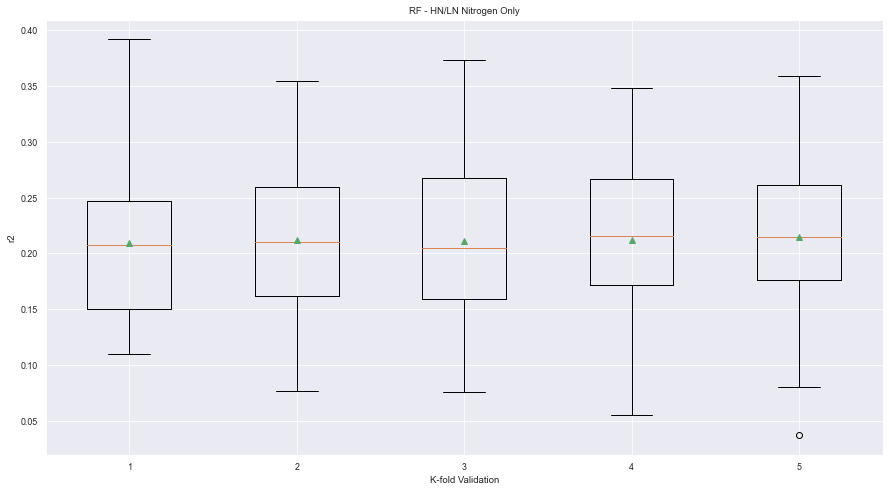

In [17]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - HN/LN Nitrogen Only")
pyplot.show()

## RF - Full Nitrogen


In [20]:
X = sub_df[sub_df.treatment =="HN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="HN"]['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_sta

>1 mean=0.0805 se=0.067
>2 mean=0.0833 se=0.050
>3 mean=0.0663 se=0.038
>4 mean=0.0983 se=0.029
>5 mean=0.1052 se=0.024


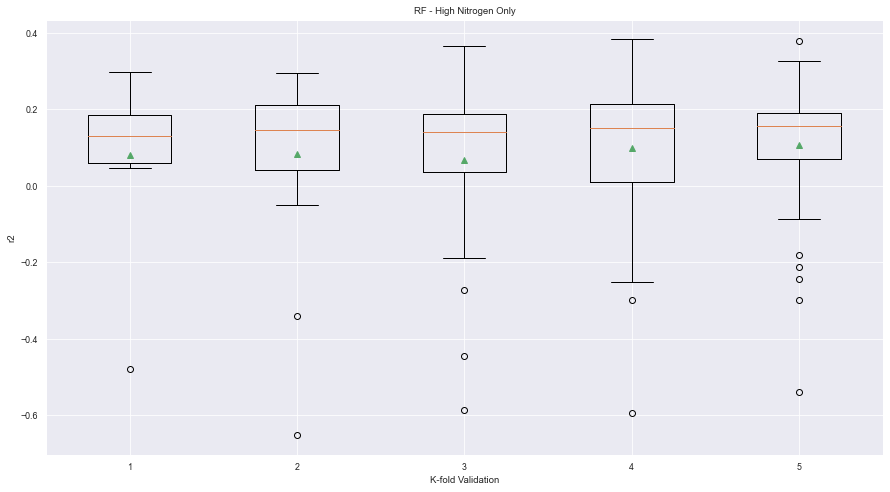

In [21]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - High Nitrogen Only")
pyplot.show()

## RF - Nitrogen Deprived

In [22]:
X = sub_df[sub_df.treatment =="LN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="LN"]['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_sta

>1 mean=0.1754 se=0.021
>2 mean=0.2028 se=0.017
>3 mean=0.1845 se=0.016
>4 mean=0.1918 se=0.015
>5 mean=0.1944 se=0.013


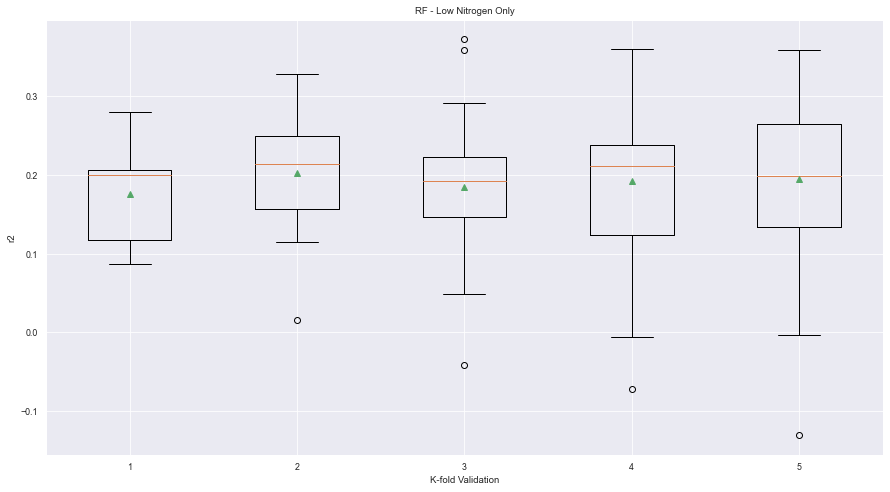

In [23]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - Low Nitrogen Only")
pyplot.show()